In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
#load the data
from google.colab import files
#upload = files.upload()
df = pd.read_csv('/content/Breast_Cancer.csv')
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [275]:
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [276]:
df = df.dropna(axis = 1)
df = df.drop(['id','perimeter_mean','area_mean','radius_worst','perimeter_worst','area_worst','compactness_mean','concavity_mean','concave points_mean','compactness_se','concavity_se','concave points_se','perimeter_se','area_se','compactness_worst','concavity_worst','concave points_worst','smoothness_worst','smoothness_mean','texture_mean','smoothness_mean','smoothness_worst','texture_worst','texture_se'],axis=1)

In [277]:
df.shape

(569, 10)

In [278]:
df['diagnosis'].value_counts()

2    357
1    212
Name: diagnosis, dtype: int64

In [279]:
df.corr()

,diagnosis,radius_mean,symmetry_mean,fractal_dimension_mean,radius_se,smoothness_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.330499,-0.048971,-0.567239,0.067016,-0.039252,-0.077972,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.147741,-0.026733,0.679469,-0.222600,-0.023760,-0.042641,0.163953,0.007066
symmetry_mean,-0.330499,0.147741,1.000000,0.197367,0.303281,0.187321,0.332341,0.331786,0.699826,0.438413
fractal_dimension_mean,-0.048971,-0.026733,0.197367,1.000000,0.099451,0.082499,0.841083,0.192142,0.185629,0.251250
radius_se,-0.567239,0.679469,0.303281,0.099451,1.000000,0.164384,0.220864,0.227943,0.094431,0.049692
smoothness_se,0.067016,-0.222600,0.187321,0.082499,0.164384,1.000000,0.231216,0.427374,-0.107342,0.101480
symmetry_se,-0.039252,-0.023760,0.332341,0.841083,0.220864,0.231216,1.000000,0.242769,0.315585,0.109199
fractal_dimension_se,-0.077972,-0.042641,0.331786,0.192142,0.227943,0.427374,0.242769,1.000000,0.111094,0.591328
symmetry_worst,-0.416294,0.163953,0.699826,0.185629,0.094431,-0.107342,0.315585,0.111094,1.000000,0.537848
fractal_dimension_worst,-0.323872,0.007066,0.438413,0.251250,0.049692,0.101480,0.109199,0.591328,0.537848,1.000000


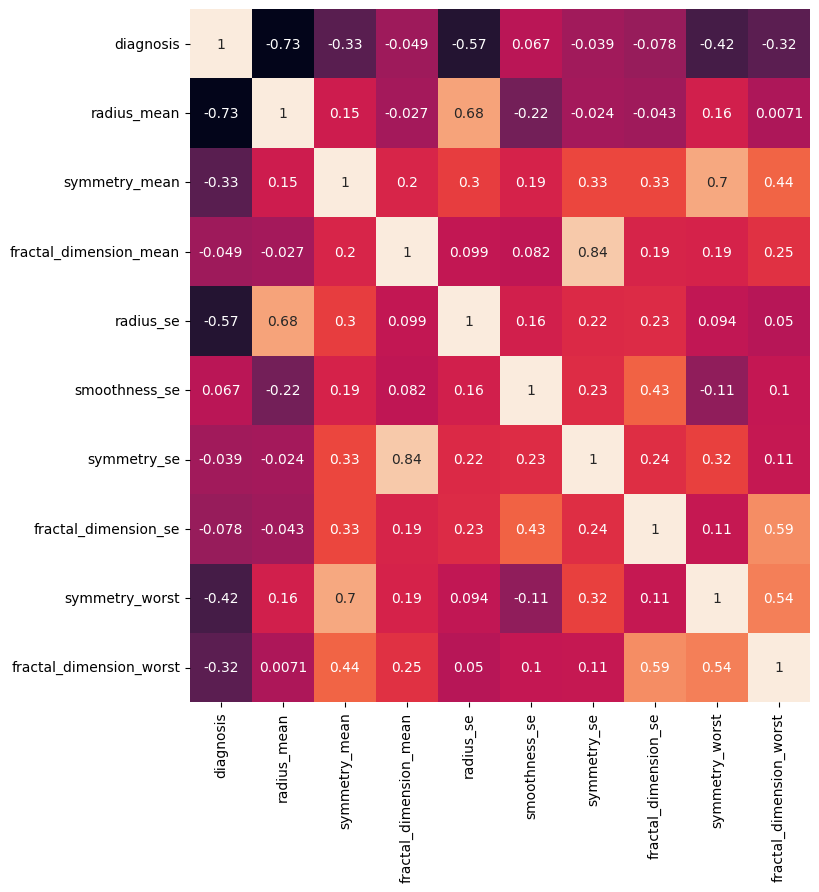

In [280]:
corr_matrix = df.corr()

ig, ax = plt.subplots(figsize = (8,9))
ax = sns.heatmap(corr_matrix,
                annot = True,
                cbar = False)

In [281]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [282]:
cat_data = df[['diagnosis']]
cat_data_encoder = ordinal_encoder.fit_transform(cat_data)

In [283]:
cat_data_encoder[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [284]:
x = df.drop("diagnosis", axis = 1)
y = df["diagnosis"]

In [285]:
x.shape

(569, 9)

In [286]:
y.shape

(569,)

In [287]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [288]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 9), (114, 9), (455,), (114,))

In [289]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
linear_svm = LinearSVC()
svc.fit(x_train, y_train)
linear_svm.fit(x_train, y_train)
svc.fit(x_train, y_train)
svc.score(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8703296703296703

In [290]:
y_preds_svc = svc.predict(x_test)
y_preds_svc

array([2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 1])

In [291]:
linear_svm.score(x_train, y_train)


0.9164835164835164

In [292]:
y_preds_linear_svc = linear_svm.predict(x_test)
y_preds_linear_svc

array([2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 1])

In [293]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_score

In [294]:
accuracy_score(y_test, y_preds_linear_svc)

0.9649122807017544

In [295]:
recall_score(y_test, y_preds_linear_svc , average = 'weighted')

0.9649122807017544

In [296]:
f1_score(y_test, y_preds_linear_svc , average = 'weighted')

0.964537136359107

In [297]:
precision_score(y_test, y_preds_linear_svc , average = 'weighted')

0.9667836257309942

In [298]:
print(confusion_matrix(y_preds_linear_svc, y_test))
def plot_confusion_matrix(y_preds_linear_svc, y_test):
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(confusion_matrix(y_preds_linear_svc, y_test),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()

[[39  0]
 [ 4 71]]


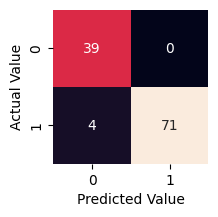

In [299]:
plot_confusion_matrix(y_preds_linear_svc, y_test)

In [300]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_preds_linear_svc, y_test)


0.9266092224680211

In [301]:
print(classification_report(y_preds_linear_svc, y_test))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        39
           2       1.00      0.95      0.97        75

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [302]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_preds_rf = random_forest.predict(x_test)
y_preds_rf
random_forest.score(x_train, y_train)
random_forest.score(x_test, y_test)


random_forest.score(x_test, y_test)

0.9210526315789473

In [303]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_score

In [304]:
precision_score(y_test,y_preds_rf, average = 'weighted')

0.9208263714842663

In [305]:
recall_score(y_test, y_preds_rf , average = 'weighted')

0.9210526315789473

In [306]:
f1_score(y_test, y_preds_rf , average = 'weighted')

0.9208642750438418

In [307]:
accuracy_score(y_test, y_preds_rf)

0.9210526315789473

In [308]:
print(confusion_matrix(y_preds_rf, y_test))
def plot_confusion_matrix(y_preds_rf, y_test):
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(confusion_matrix(y_preds_rf, y_test),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()

[[38  4]
 [ 5 67]]


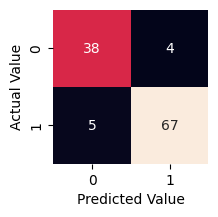

In [309]:
plot_confusion_matrix(y_preds_rf, y_test)

In [310]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_preds_rf, y_test)

0.8313407150271239

In [311]:
print(classification_report(y_preds_rf, y_test))

              precision    recall  f1-score   support

           1       0.88      0.90      0.89        42
           2       0.94      0.93      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



LIGHTGBM CLASSIFIER

In [312]:
import lightgbm as lgb
lightgbm_lgb = lgb.LGBMClassifier()
lightgbm_lgb.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1368
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier()

In [313]:
y_preds_lgb = lightgbm_lgb.predict(x_test)

In [314]:
y_preds_lgb

array([2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 1])

In [315]:
lightgbm_lgb.score(x_test,y_test)

0.9298245614035088

In [316]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_score

In [317]:
precision_score(y_test,y_preds_lgb, average = 'weighted')

0.9298245614035088

In [318]:
recall_score(y_test,y_preds_lgb, average = 'weighted')

0.9298245614035088

In [319]:
f1_score(y_test,y_preds_lgb, average = 'weighted')

0.9298245614035088

In [320]:
accuracy_score(y_test,y_preds_lgb)

0.9298245614035088

In [321]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_preds_lgb, y_test)

0.8506387160170324

In [322]:
print(confusion_matrix(y_preds_lgb, y_test))
def plot_confusion_matrix(y_preds_lgb, y_test):
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(confusion_matrix(y_preds_lgb, y_test),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()

[[39  4]
 [ 4 67]]


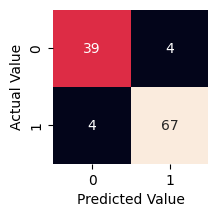

In [323]:
plot_confusion_matrix(y_preds_lgb, y_test)

In [324]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds_lgb))

              precision    recall  f1-score   support

           1       0.91      0.91      0.91        43
           2       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



*NU*SVM

In [325]:
from sklearn.svm import NuSVC

In [326]:
nsvc = NuSVC()
nsvc.fit(x_train,y_train)

NuSVC()

In [327]:
y_preds_nsvc = nsvc.predict(x_test)
y_preds_nsvc

array([2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 1])

In [328]:
nsvc.score(x_test,y_test)

0.8859649122807017

In [329]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_score

In [330]:
accuracy_score(y_test,y_preds_nsvc)

0.8859649122807017

In [331]:
precision_score(y_test,y_preds_nsvc, average = 'weighted')

0.9036131996658312

In [332]:
recall_score(y_test,y_preds_nsvc, average = 'weighted')

0.8859649122807017

In [333]:
f1_score(y_test,y_preds_lgb, average = 'weighted')

0.9298245614035088

In [334]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_preds_nsvc, y_test)

0.7679199155366013

In [335]:
print(confusion_matrix(y_preds_nsvc, y_test))
def plot_confusion_matrix(y_preds_nsvc, y_test):
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(confusion_matrix(y_preds_nsvc, y_test),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()

[[30  0]
 [13 71]]


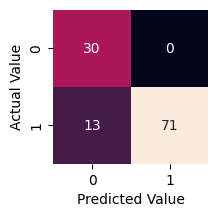

In [336]:
plot_confusion_matrix(y_preds_nsvc, y_test)

In [337]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds_nsvc))

              precision    recall  f1-score   support

           1       1.00      0.70      0.82        43
           2       0.85      1.00      0.92        71

    accuracy                           0.89       114
   macro avg       0.92      0.85      0.87       114
weighted avg       0.90      0.89      0.88       114



extra tree classifier

In [338]:
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier(random_state=42)

ext.fit(x_train, y_train)


ExtraTreesClassifier(random_state=42)

In [339]:
y_preds_ext = ext.predict(x_test)
y_preds_ext

array([2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 1])

In [340]:
ext.score(x_test,y_test)

0.9298245614035088

In [341]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_score

accuracy_score(y_test,y_preds_ext)




0.9298245614035088

In [342]:
precision_score(y_test,y_preds_ext, average = 'weighted')

0.9297424985785546

In [343]:
recall_score(y_test,y_preds_ext, average = 'weighted')

0.9298245614035088

In [344]:
f1_score(y_test,y_preds_ext, average = 'weighted')

0.9294764689501531

In [345]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_preds_ext, y_test)

0.8498599114120655

In [346]:
print(confusion_matrix(y_preds_ext, y_test))
def plot_confusion_matrix(y_preds_ext, y_test):
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(confusion_matrix(y_preds_ext, y_test),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()

[[38  3]
 [ 5 68]]


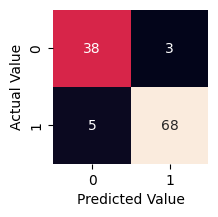

In [347]:
plot_confusion_matrix(y_preds_ext,y_test)

In [348]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds_ext))

              precision    recall  f1-score   support

           1       0.93      0.88      0.90        43
           2       0.93      0.96      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



plotting of all accuracy and scores of the classifiers used

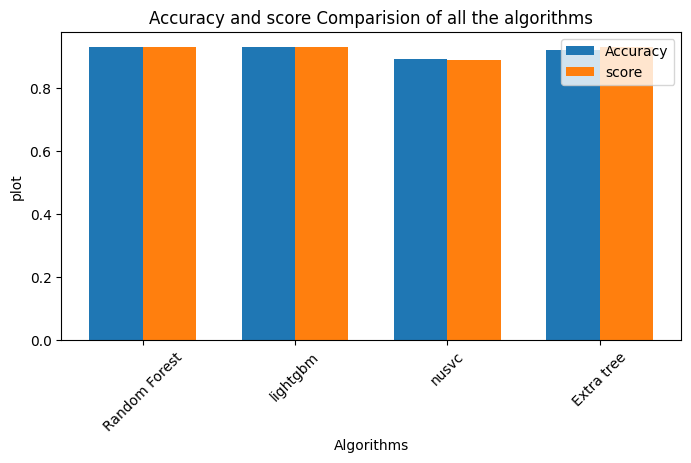

In [349]:
import matplotlib.pyplot as plt


# Algorithm names
algorithms = ['Random Forest','lightgbm','nusvc','Extra tree']

# Accuracy and training time values
accuracy = [0.93,0.93,0.89,0.92]
score = [0.9298245614035088,0.9298245614035088,0.8859649122807017,0.9298245614035088]

# Set the width of the bars
bar_width = 0.35

# Create a numpy array for the x-axis positions
x = np.arange(len(algorithms))

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 4))
accuracy_bars = ax.bar(x, accuracy, bar_width, label='Accuracy')
score_bars = ax.bar(x + bar_width ,score,bar_width, label='score')

# Set the labels, title, and legend
ax.set_xlabel('Algorithms')
ax.set_ylabel('plot')
ax.set_title('Accuracy and score Comparision of all the algorithms')
ax.set_xticks(x + bar_width /2)
ax.set_xticklabels(algorithms, rotation=45)
ax.legend()

# Display the plot
plt.show()

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

Voting Classifier supports two types of votings.

Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.
Soft Voting: In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier


ROC PLOT,train test plot,training validation loss curve..

In [350]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [351]:
ns_probs = [0 for _ in range(len(y_test))]

lr_probs = random_forest.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)




In [352]:
print(ns_auc)
print(lr_auc)

0.5
0.9880445463478545


In [353]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('random_forest: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
random_forest: ROC AUC=0.988


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 5) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


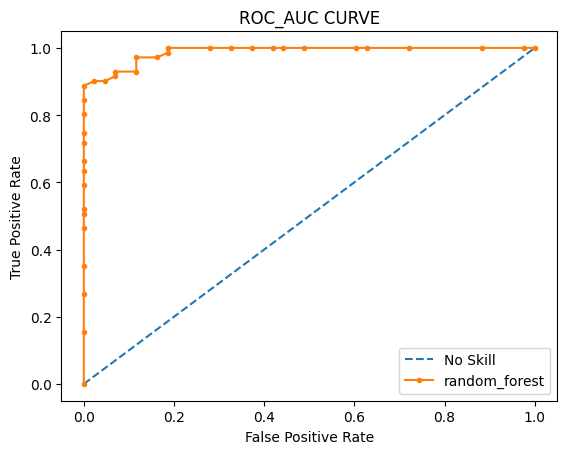

In [354]:

y_true = y_test
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Assuming y_true contains {-3, -2}
# Convert labels to {0, 1} by adding 3 (or any suitable transformation)
y_true_binary = y_true - 1




# Assuming y_preds_rf, ns_probs, and lr_probs are defined

# Specify pos_label=4 if you want 4 to be the positive class (3 + 1)
precision = precision_score(y_true_binary, y_preds_rf, pos_label=5, average='weighted')
ns_fpr, ns_tpr, _ = roc_curve(y_true_binary, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_true_binary, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='random_forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC CURVE')
# show the legend
plt.legend()
# show the plot
plt.show()

######## RANDOM FOREST



In [355]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc


In [356]:
# lr_probs = random_forest.predict_proba(x_test)
# # keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]
# # predict class values
# yhat = random_forest.predict(x_test)
# precision_score,recall_score,_ = precision_recall_curve(y_test, lr_probs)
# f1_score, lr_auc = f1_score(y_test, yhat), auc(precision_score,recall_score)
# # summarize scores
# print('Logistic: f1=%.3f auc=%.3f' % (f1_score, lr_auc))
# # plot the precision-recall curves
# no_skill = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# plt.plot(precision_score,recall_score,marker='.',label='Logistic')
# # axis labels
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# # show the legend
# plt.legend()
# # show the plot
# plt.show()

In [357]:
from sklearn.metrics import roc_auc_score


# Assuming you have trained your SVM model (svc) before this point

# Decision function instead of predict_proba for SVM
svm_decision = svc.decision_function(x_test)

# Calculate scores
ns_auc1 = roc_auc_score(y_test, [0 for _ in range(len(y_test))])
svm_auc = roc_auc_score(y_test, svm_decision)



In [358]:
print(ns_auc1)
print(svm_auc)

0.5
0.9698657058630854


In [359]:
print('No Skill: ROC AUC=%.3f' % (ns_auc1))
print('SVM: ROC AUC=%.3f' % (svm_auc))

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.970


In [360]:
y_score = svc.decision_function(x_test)[:, 1]
y_score = y_score.ravel()
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for SVM Classifier')
plt.legend(loc='lower right')
plt.show()

IndexError: ignored

In [ ]:
y_true = y_test

from sklearn.metrics import precision_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_true contains {-3, -2}
# Convert labels to {0, 1} by adding 3 (or any suitable transformation)
y_true_binary = y_true -1

# Assuming y_preds_linear_svc, ns_auc1, and svm_auc are defined

# Calculate precision
precision = precision_score(y_true_binary, y_preds_linear_svc, pos_label=5, average='weighted')

# Assuming ns_auc1 contains decision function scores for the No Skill model
#ns_auc = roc_auc_score(y_true_binary, ns_auc1)

# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_true_binary, ns_auc1)
svm_fpr, svm_tpr, _ = roc_curve(y_true_binary, svm_auc)

# Check if there is only one unique value in FPR and TPR arrays
if len(set(ns_fpr)) == 1 and len(set(ns_tpr)) == 1:
    ns_fpr = [0, 1]
    ns_tpr = [0, 1]

if len(set(svm_fpr)) == 1 and len(set(svm_tpr)) == 1:
    svm_fpr = [0, 1]
    svm_tpr = [0, 1]

# Plot ROC curves
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC CURVE')
# Show the legend
plt.legend()
# Show the plot
plt.show()



